# **Introduction**

<div style = "text-align: justify;">

***Naive Bayes** is a machine learning classification algorithm based on the Bayes' Theorem that predicts a data point's category based on probability*. It assumes that each feature contributes to the result independently, even if this isn’t always true in reality (this is called the “naive” assumption). Naive Bayes excels in a variety of real-world applications, including spam filtering, document categorization, and sentiment analysis. [This article](https://www.geeksforgeeks.org/machine-learning/naive-bayes-classifiers/) sums everything up quite nicely. There are **three** types of naive Bayes classifiers, each suited for different types of data:

1. Multinomial Naive Bayes
2. Bernoulli Naive Bayes
3. Gaussian Naive Bayes

***Neural Network** is a machine learning model inspired by the human brain that learns patterns by passing data through layers of interconnected nodes (called neurons)*. Each neuron applies a weight and an activation function to the input, allowing the network to model complex, non-linear relationships between inputs and outputs. By adjusting these weights during training, neural networks can learn from data and improve their predictions over time. They are widely used in tasks such as image recognition, speech processing, recommendation systems, and natural language processing. [This article](https://www.geeksforgeeks.org/machine-learning/neural-networks-a-beginners-guide/) provides a clear overview of how neural networks work. There are various types of neural networks, some of them are not appropriate for the type of dataset in this project.

> This project is aimed at comparing the Naive Bayes Classifiers mentioned above with Neural Network Models and see how much the performance changes. From [Project 01](https://github.com/tasnimtalha09/applied-machine-learning-for-business/tree/main/Project%2001%20—%20Understanding%20%26%20Explaining%20a%20Machine%20Learning%20Algorithm), we saw that **Multinomial Naive Bayes** outperforms the other two naive Bayes classifiers on text data. So, we will compare the performance of Multinomial Naive Bayes with Neural Network Models in this project.

## The Models Used

The models used in this project are:
1. Multinomial Naive Bayes
2. Multi-Layer Perceptron (MLP)
3. 1D Convolutional Neural Network (1D CNN)
4. Gated Recurrent Unit (GRU)
5. Long Short-Term Memory (LSTM)
6. Bidirectional Long Short-Term Memory (BiLSTM)
7. CNN + LSTM Hybrid Model

A short introduction on each model along with relevant links are provided in the respective sections.

</div>

<div style = "text-align: justify;">

## Aims & Objectives

### **Broad Objective**
To compare the performance of Multinomial Naive Bayes with various Neural Network Models on the SMS Spam Collection Dataset for spam detection and see whether neural networks outperform the Naive Bayes classifier on this text classification task.

### **Specific Objectives**

1. To preprocess and prepare the SMS Spam Collection dataset for classification by encoding target labels, tokenizing text data using CountVectorizer, TfidfVectorizer, and Keras Tokenizer, and splitting the data into training and testing sets while preserving the class distribution through stratified sampling.
2. To implement and train **seven** classification models—Multinomial Naive Bayes (MNB), Multi-Layer Perceptron (MLP), 1D Convolutional Neural Network (1D CNN), Gated Recurrent Unit (GRU), Long Short-Term Memory (LSTM), Bidirectional LSTM (BiLSTM), and CNN + LSTM Hybrid—on the SMS spam detection task.
3. To evaluate and compare model performance using multiple metrics including accuracy, precision, recall, F1-score, ROC-AUC score, and confusion matrices to determine which model best balances spam detection effectiveness with minimal false positives and false negatives.
4. To assess model generalization capability by analyzing the difference between training and testing accuracies to identify potential overfitting issues and ensure reliable performance on unseen data.
5. To determine whether complex neural network architectures provide significant performance gains over the simpler probabilistic Multinomial Naive Bayes classifier for text-based spam detection, thereby informing model selection decisions based on the trade-off between complexity and accuracy.

</div>

## Importing the Required Libraries & the Dataset

<div style = "text-align: justify;">

After running the whole notebook multiple times, we saw that the results vary each time due to the inherent randomness in neural network training (e.g., weight initialization, data shuffling). To ensure consistent and reproducible results across different runs, we set random seeds for all relevant libraries. This way, the random processes produce the same outcomes each time the code is executed.

</div>

In [1]:
## This cell block was written with the help of AI

# Importing necessary libraries for reproducibility
import os
import random

# Set environment variables BEFORE importing TensorFlow
os.environ["PYTHONHASHSEED"] = "49"
os.environ["TF_DETERMINISTIC_OPS"] = "1"
os.environ["TF_CUDNN_DETERMINISTIC"] = "1"

# Suppress TensorFlow logging messages
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"  # 0 = all, 1 = info, 2 = warning, 3 = error only

# Now import libraries that require the seeds to be set
import numpy as np
import tensorflow as tf

# Set all random seeds
SEED = 49
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

# Now import other libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings("ignore")

/opt/homebrew/lib/python3.12/site-packages/keras/src/export/tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


### **Dataset Overview**

<div style = "text-align: justify;">

The dataset used is the **SMS Spam Collection** dataset, which is a set of **5572** SMS tagged messages that have been collected for mobile phone spam research. The dataset is available [here](https://archive.ics.uci.edu/ml/machine-learning-databases/00228/smsspamcollection.zip) to download and work manually or [here](https://archive.ics.uci.edu/dataset/228/sms+spam+collection) if directly fetched from online. Both versions of the code are tied with a `try-except` block. If the local file is not found, it will fetch from online.

</div>

In [2]:
## Some guidance from AI were taken for loading the dataset from web

# Try to load the local file first
try:
    sms = pd.read_csv(filepath_or_buffer = "SMSSpamCollection", sep = "\t", header = None, names = ["label", "message"])
    print("File loaded successfully from local storage.")

# If file not found, download and load it from the web
except FileNotFoundError:
    print("Local file not found. Fetching it online...")

    # Downloading the zip file from UCI repository
    import requests, zipfile, io
    url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00228/smsspamcollection.zip"
    r = requests.get(url)

    # Extract and read the data file inside the zip
    with zipfile.ZipFile(io.BytesIO(r.content)) as z:
        with z.open("SMSSpamCollection") as f:
            sms = pd.read_csv(filepath_or_buffer = f, sep = "\t", header = None, names = ["label", "message"])

    print("File successfully fetched online and loaded.")

# Display first few rows
print(f"The Dataset contains {sms.shape[0]:,} rows and {sms.shape[1]:,} columns.")
sms.head(n = 10)

File loaded successfully from local storage.
The Dataset contains 5,572 rows and 2 columns.


,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


<div style = "text-align: justify;">

We can see that the dataset has two columns: `label` and `message`. The `label` column contains the target variable, which indicates whether the message is spam or ham (not spam). The `message` column contains the actual text of the SMS message.

</div>

We quickly check the proportion of hams and spams to check the overall balance. This will later help us in the train-test split.

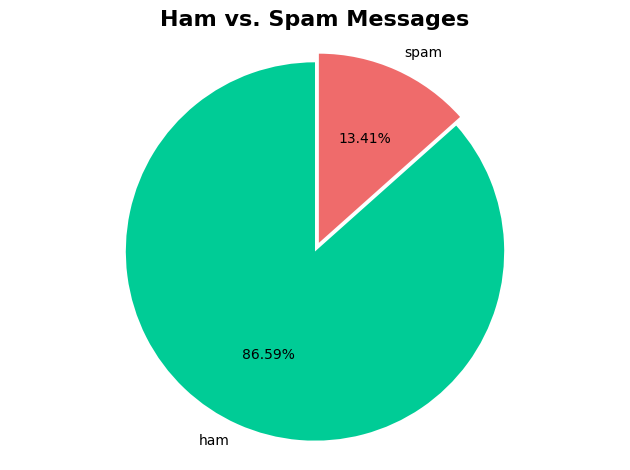

In [3]:
# Calculating the ratio of hams and spams
spam_ham_ratio = round(number = sms["label"].value_counts(normalize = True), ndigits = 4) * 100

## Some help from ChatGPT were taken to build this pie-chart
# Create a simple pie chart
plt.pie(
    x = spam_ham_ratio.values,
    labels = spam_ham_ratio.index,
    autopct = "%1.2f%%",
    colors = ["#00CC96", "#EF6B6B"],
    startangle = 90,
    explode = (0, 0.05)
)

# Customizing the plot
plt.title(label = "Ham vs. Spam Messages", fontsize = 16, fontweight = "bold")
plt.axis("equal")
plt.tight_layout()
plt.show()

<div style = "text-align: justify;">

So, this dataset has roughly **87%** ham messages and **13%** spam messages. The dataset is imbalanced, which means that the number of instances in each class is not equal. This can lead to biased results if not handled properly. We will preserve this spam:ham ratio while splitting the dataset.

</div>

# **Machine Learning**

Now, we preprocess the data and train the models one by one. The detailed explanation of each step is provided in the notebook itself.

## Data Preprocessing

### **Target Variable Encoding**

We encode the labels, where `ham` is encoded as 0 and `spam` is encoded as 1.

In [4]:
# Encoding the target variable
sms["label_encoding"] = sms["label"].map({"ham": 0, "spam": 1})

### **Train-Test Split**

<div style = "text-align: justify;">

Now, time for a train-test split. We will use **70%** of the data for training and **30%** for testing. We will also use stratified sampling to ensure that the proportion of ham and spam messages is the same in both the training and testing sets. But, we have also replicated the model without stratified sampling and found that the results do not vary significantly. So, we will proceed with stratified sampling.

</div>

In [5]:
# Conducting the train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    sms["message"],
    sms["label_encoding"],
    test_size = 0.3,
    stratify = sms["label_encoding"],
    random_state = 49
)

Now that the data is preprocessed, we can move on to model training and evaluation.

## Modeling

We call the necessary libraries, create the respective model objects, fit the models with the training data, and make predictions with the test data. We will check the results in the next couple of cells.

### **1. Multinomial Naive Bayes**

<div style = "text-align: justify;">

Multinomial Naive Bayes is a version of the Naive Bayes algorithm that is best suited for discrete data and is commonly used in text classification issues like spam detection or sentiment analysis. Instead of just checking whether a word appears or not (which is the working mechanism of Bernoulli Naive Bayes), it looks at how many times each word repeats in a document and uses those counts to calculate probabilities for each class. For more details, refer to [this article](https://www.geeksforgeeks.org/machine-learning/multinomial-naive-bayes/).

</div>

<div style = "text-align: justify;">

First, we encode the data for MultinomialNB. We encode the data using `CountVectorizer` for Multinomial Naive Bayes. This encoder converts a collection of text documents to a matrix of token counts, i.e., it counts how many times each word appears. 

We also used `stop_words = "english"` in both vectorizers to remove common English words that may not be useful for classification. Examples of such stop words include "the", "is", "in", "and", etc. Removing these words can help improve the performance of the model by reducing noise in the data.

</div>

In [6]:
# Importing the required library
from sklearn.feature_extraction.text import CountVectorizer
vectoriser_mnb = CountVectorizer(stop_words = "english")

# Transforming the text data into numerical format
X_train_mnb = vectoriser_mnb.fit_transform(raw_documents = X_train)
X_test_mnb = vectoriser_mnb.transform(raw_documents = X_test)

Now that we have encoded the data, we can proceed to fit the Multinomial Naive Bayes model.

In [7]:
# Importing the library
from sklearn.naive_bayes import MultinomialNB

# Creating the model object
mnb = MultinomialNB()

# Fitting the model
mnb.fit(X = X_train_mnb, y = y_train)

# Predicting the test dataset
y_predict_test_mnb = mnb.predict(X = X_test_mnb)

<div style = "text-align: justify;">

After fitting the model, we make predictions on the test set using the **accuracy score**, **confusion matrix**, and **classification report** (which provide detailed metrics such as precision, recall, and F1-score) to evaluate the model's performance.

</div>

In [8]:
# Importing the necessary libraries
from sklearn.metrics import accuracy_score, classification_report

# Calculating the accuracy scores for test dataset
accuracy_test_mnb = accuracy_score(y_true = y_test, y_pred = y_predict_test_mnb)

# Generating the Classification reports for test dataset
report_mnb = classification_report(y_true = y_test, y_pred = y_predict_test_mnb)

# Printing a comprehensive summary Report
print(
f"""Model Performance Report for Multinomial Naive Bayes
Accuracy Score: {accuracy_test_mnb:.3%}

{report_mnb}"""
)

Model Performance Report for Multinomial Naive Bayes
Accuracy Score: 98.684%

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1448
           1       0.97      0.93      0.95       224

    accuracy                           0.99      1672
   macro avg       0.98      0.96      0.97      1672
weighted avg       0.99      0.99      0.99      1672



<div style = "text-align: justify;">

**Key Insights**
* The model achieves an overall accuracy of **98.68%**, indicating strong classification performance.  
* For spam messages (1), it records a **precision of 97%**, meaning most predicted spam messages are actually spam.  
* The **recall of 93%** shows that a small portion of spam messages are missed.  
* This results in an **F1-score of 95%**, reflecting a strong balance between precision and recall.
* **Overall**, Multinomial Naive Bayes performs exceptionally well on spam detection, showing that a simple probabilistic model can rival more complex approaches on short, keyword-driven text data.

***From our next model, we will skip the key insights section to avoid redundancy. After running all the models, we will summarize the performance metrics in a comparative table and generate an overall key insights section.***

</div>

Now, we generate the confusion matrix for Multinomial Naive Bayes.

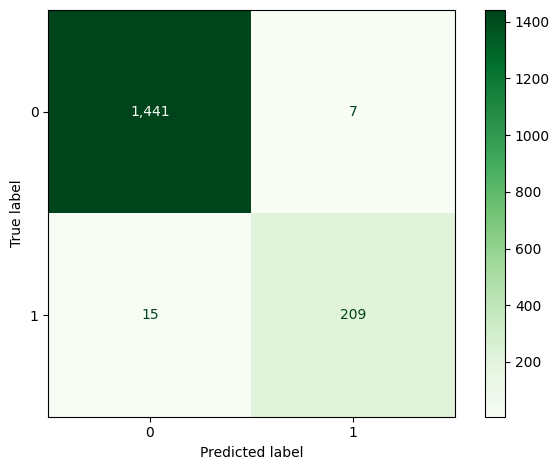

In [9]:
# Importing the necessary libraries
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Confusion Matrix for Multinomial Naive Bayes
matrix_mnb = confusion_matrix(y_true = y_test, y_pred = y_predict_test_mnb)
ConfusionMatrixDisplay(confusion_matrix = matrix_mnb).plot(cmap = "Greens", values_format = ",.0f")

# Displaying the matrix
plt.tight_layout()
plt.show()

***Similar to the performance metrics, we will combine all the confusion matrices from the different models into a single comparative visualization and generate inisghts from there.***

Finally, we generate the ROC (Receiver Operating Characteristic) AUC (Area Under the Curve) score and the ROC curve for Multinomial Naive Bayes.

The ROC-AUC score for MultinomialNB is: 99.066%


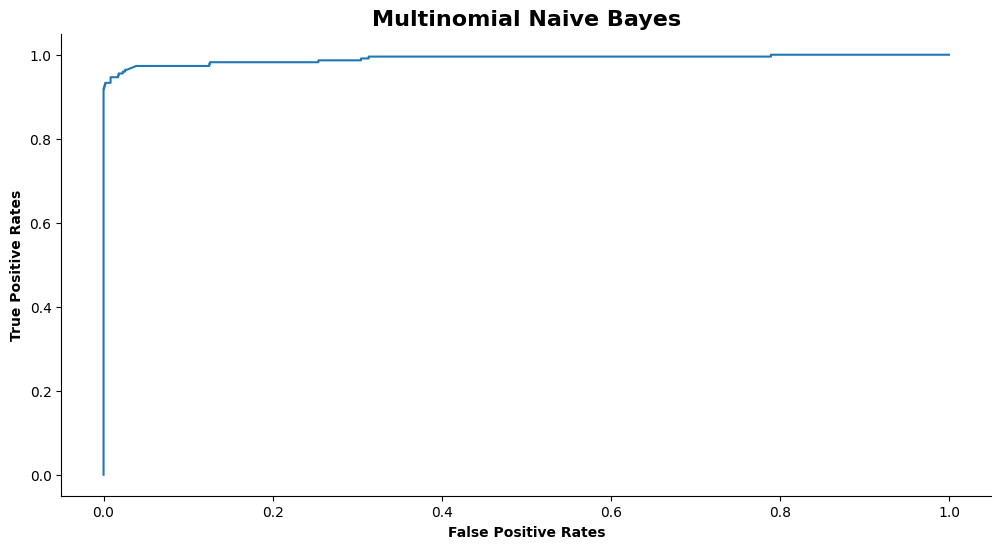

In [10]:
# Importing the necessary libraries
from sklearn.metrics import roc_curve, roc_auc_score

# MultinomialNB
y_prob_mnb = mnb.predict_proba(X = X_test_mnb)[:, 1]
fpr_mnb, tpr_mnb, thresholds_mnb = roc_curve(y_true = y_test, y_score = y_prob_mnb)

# Calculating the ROC-AUC for the model
roc_score_mnb = roc_auc_score(y_true = y_test, y_score = y_prob_mnb)
print(f"The ROC-AUC score for MultinomialNB is: {roc_score_mnb:.3%}")

# Plotting & customizing the ROC curve
plt.figure(figsize = (12, 6))
plt.plot(fpr_mnb, tpr_mnb)
plt.title(label = "Multinomial Naive Bayes", fontsize = 16, fontweight = "bold")
plt.xlabel(xlabel = "False Positive Rates", fontweight = "bold")
plt.ylabel(ylabel = "True Positive Rates", fontweight = "bold")
sns.despine()
plt.show()

<div style = "text-align: justify;">

Now, we will proceed to fit the Neural Network models. We will cover a total of **six** different models:
1. Multi-Layer Perceptron (MLP)
2. 1D Convolutional Neural Network (1D CNN)
3. Gated Recurrent Unit (GRU)
4. Long Short-Term Memory (LSTM)
5. Bidirectional Long Short-Term Memory (BiLSTM)
6. CNN + LSTM Hybrid Model

</div>

### **2. Multi-Layer Perceptron**

<div style = "text-align: justify;">

A Multi-Layer Perceptron (MLP) is a basic type of artificial neural network made of an input layer, one or more hidden layers, and an output layer of interconnected “neurons” that transform and learn patterns in data using nonlinear activations. Its goal is to model complex relationships between inputs and outputs by adjusting weights during training. MLPs are used for supervised tasks like classification or regression, such as recognizing handwritten digits from image pixels or predicting whether an email is spam based on features. For more details, refer to [this article](https://www.geeksforgeeks.org/deep-learning/multi-layer-perceptron-learning-in-tensorflow/).

</div>

<div style = "text-align: justify;">

Multil-Layer Perceptron uses `TfidfVectorizer`, which converts the text documents to a matrix of TF-IDF features. **TF-IDF** stands for *Term Frequency-Inverse Document Frequency*, which reflects how important a word is to a document in a collection or corpus. We convert the encoded data to arrays using the `.toarray()` method because the MLP model requires the input to be in array format. We have used `stop_words = "english"` here as well.

</div>

In [11]:
# Importing the required library
from sklearn.feature_extraction.text import TfidfVectorizer
vectoriser_mlp = TfidfVectorizer(stop_words = "english")

# Transforming the text data into numerical format
X_train_mlp = vectoriser_mlp.fit_transform(raw_documents = X_train).toarray()
X_test_mlp = vectoriser_mlp.transform(raw_documents = X_test).toarray()

Now, we proceed to fit the model.

In [12]:
# Importing the required libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Building the MLP for Binary Classification
mlp = Sequential(
    [
        Dense(units = 256, activation = "relu", input_shape = (X_train_mlp.shape[1],)),
        BatchNormalization(),
        Dropout(rate = 0.3),

        Dense(units = 128, activation = "relu"),
        BatchNormalization(),
        Dropout(rate = 0.3),

        Dense(units = 64, activation = "relu"),
        BatchNormalization(),
        Dropout(rate = 0.2),
        Dense(units = 32, activation = "relu"),

        Dense(units = 1, activation = "sigmoid")  # Sigmoid for binary classification
    ]
)

# Compiling the model for classification
mlp.compile(
    optimizer = Adam(learning_rate = 0.001),
    loss = "binary_crossentropy",  # Binary cross-entropy for classification
    metrics = ["accuracy"]
)

# Training with early stopping
early_stopping = EarlyStopping(
    monitor = "val_loss",
    patience = 20,
    restore_best_weights = True
)

# Fitting the model
history = mlp.fit(
    x = X_train_mlp,
    y = y_train,
    validation_split = 0.2,
    epochs = 200,
    batch_size = 32,
    callbacks = [early_stopping],
    verbose = 0
)

# Predicting the test set results
y_predict_test_mlp = mlp.predict(X_test_mlp)
y_predict_test_mlp = (y_predict_test_mlp >= 0.5).astype(int)

53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


After fitting the model, we make predictions on the test set using the **accuracy score**, **confusion matrix**, and **classification report** (which provide detailed metrics such as precision, recall, and F1-score) to evaluate the model's performance.

In [13]:
# Calculating the accuracy scores for test dataset
accuracy_test_mlp = accuracy_score(y_true = y_test, y_pred = y_predict_test_mlp)

# Generating the Classification reports for test dataset
report_mlp = classification_report(y_true = y_test, y_pred = y_predict_test_mlp)

# Printing a comprehensive summary Report of the three models
print(
f"""Model Performance Report for Multi-layer Perceptron
Accuracy Score: {accuracy_test_mlp:.3%}

{report_mlp}"""
)

Model Performance Report for Multi-layer Perceptron
Accuracy Score: 98.266%

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1448
           1       0.96      0.91      0.93       224

    accuracy                           0.98      1672
   macro avg       0.97      0.95      0.96      1672
weighted avg       0.98      0.98      0.98      1672



Now, we create the confusion matrix for Multi-Layer Perceptron.

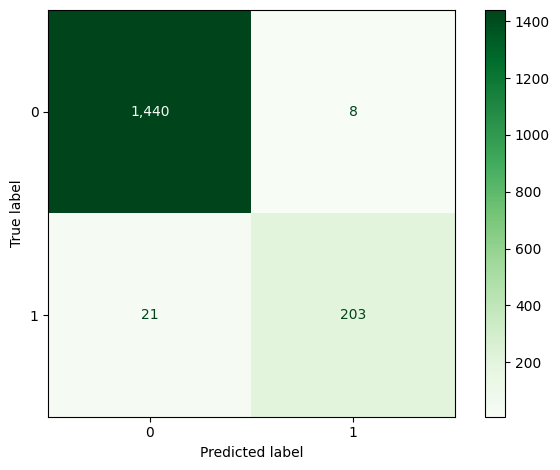

In [14]:
# Creating the Confusion Matrix for MLP
matrix_mlp = confusion_matrix(y_true = y_test, y_pred = y_predict_test_mlp)
ConfusionMatrixDisplay(confusion_matrix = matrix_mlp).plot(cmap = "Greens", values_format = ",.0f")

# Displaying the matrix
plt.tight_layout()
plt.show()

Finally, we determine the ROC AUC score and plot the ROC curve for 1D Multi-Layer Perceptron.

53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
The ROC-AUC score for Multi-Layer Perceptron is: 98.100%


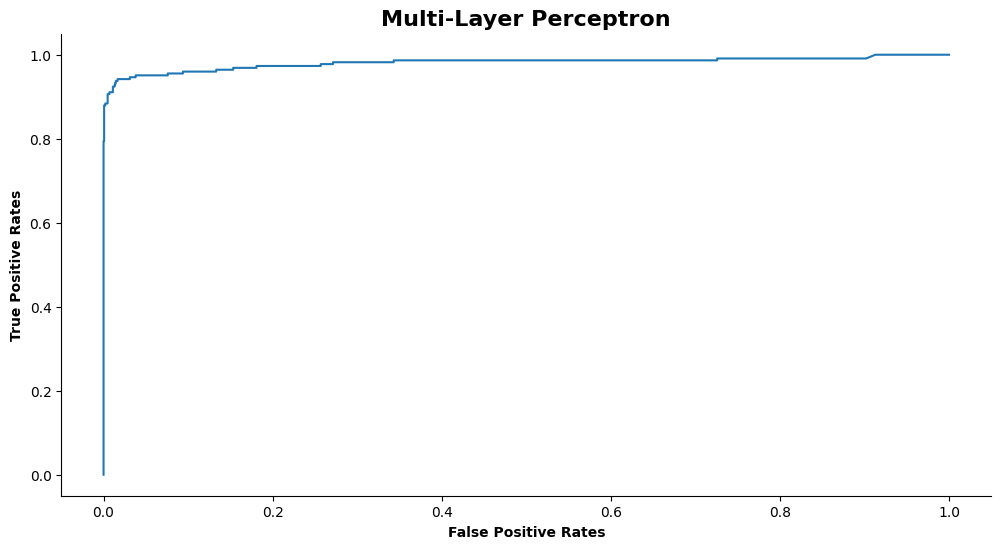

In [15]:
# MLP probabilities
y_prob_mlp = mlp.predict(X_test_mlp).ravel()
fpr_mlp, tpr_mlp, thresholds_mlp = roc_curve(y_true = y_test, y_score = y_prob_mlp)

# Calculating the ROC-AUC for the model
roc_score_mlp = roc_auc_score(y_true = y_test, y_score = y_prob_mlp)
print(f"The ROC-AUC score for Multi-Layer Perceptron is: {roc_score_mlp:.3%}")

# Plotting & customizing the ROC curve
plt.figure(figsize = (12, 6))
plt.plot(fpr_mlp, tpr_mlp)
plt.title(label = "Multi-Layer Perceptron", fontsize = 16, fontweight = "bold")
plt.xlabel(xlabel = "False Positive Rates", fontweight = "bold")
plt.ylabel(ylabel = "True Positive Rates", fontweight = "bold")
sns.despine()
plt.show()

### **3. 1D Convolutional Neural Network**

<div style = "text-align: justify;">

A 1D Convolutional Neural Network (1D CNN) is a neural network that applies convolution filters along one dimension, making it especially effective for sequential data like text. In text classification, a 1D CNN scans sequences of words to detect local patterns such as important keywords or short phrases (n-grams) that are strong indicators of a class. It works well because it can automatically learn which word patterns signal spam without relying on word order across the entire sentence. A common example is spam detection, where phrases like “free offer” or “win now” are picked up by convolution filters. For more details, refer to [this article](https://www.geeksforgeeks.org/deep-learning/what-is-a-1d-convolutional-layer-in-deep-learning/).

</div>

<div style = "text-align: justify;">

For the 1D CNN and subsequent neural network models, we use `Tokenizer` and `pad_sequences` from Keras to prepare the text data. The `Tokenizer` converts each word in the text to a unique integer index, creating a vocabulary of the most frequent words (limited to 5,000 words here). Then, `pad_sequences` ensures all sequences have the same length by padding shorter messages with zeros or truncating longer ones to `max_len = 150`. This fixed-length integer sequence format is required for the `Embedding` layer, which learns dense vector representations of words during training. Unlike TF-IDF, this approach preserves word order, making it suitable for models that capture sequential patterns.

</div>

In [16]:
# Importing the required library
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Tokenizing the text data
max_words = 5000  # Vocabulary size
max_len = 150     # Maximum sequence length

tokenizer_cnn = Tokenizer(num_words = max_words)
tokenizer_cnn.fit_on_texts(texts = X_train)

# Converting text to sequences
X_train_cnn = pad_sequences(tokenizer_cnn.texts_to_sequences(X_train), maxlen = max_len)
X_test_cnn = pad_sequences(tokenizer_cnn.texts_to_sequences(X_test), maxlen = max_len)

Now, we proceed to fit the model.

In [17]:
# Importing the required libraries
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D

# Building the 1D CNN model
cnn = Sequential(
    [
        Embedding(input_dim = max_words, output_dim = 128, input_length = max_len),
    
        Conv1D(filters = 128, kernel_size = 5, activation = "relu"),
        GlobalMaxPooling1D(),
    
        Dense(units = 64, activation = "relu"),
        Dropout(rate = 0.3),
        
        Dense(units = 32, activation = "relu"),
        Dropout(rate = 0.2),
        
        Dense(units = 1, activation = "sigmoid")  # Sigmoid for binary classification
    ]
)

# Compiling the model
cnn.compile(
    optimizer = "adam",
    loss = "binary_crossentropy",
    metrics = ["accuracy"]
)

# Model summary
cnn.summary()

# Training with early stopping
early_stopping_cnn = EarlyStopping(
    monitor = "val_loss",
    patience = 10,
    restore_best_weights = True
)

# Fitting the model
history_cnn = cnn.fit(
    x = X_train_cnn, 
    y = y_train,
    validation_split = 0.2,
    epochs = 50,
    batch_size = 32,
    callbacks = [early_stopping_cnn],
    verbose = 0
)

# Predicting the test set results
y_predict_test_cnn = (cnn.predict(X_test_cnn) >= 0.5).astype(int)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d            │ ?                      │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


Now, we calculate the accuracy score, confusion matrix, and classification report to evaluate the model's performance.

In [18]:
# Calculating the accuracy scores for test dataset
accuracy_test_cnn = accuracy_score(y_true = y_test, y_pred = y_predict_test_cnn)

# Generating the Classification reports for test dataset
report_cnn = classification_report(y_true = y_test, y_pred = y_predict_test_cnn)

# Printing a comprehensive summary Report of the three models
print(
f"""Model Performance Report for 1-Dimensional Convolutional Neural Network
Accuracy Score: {accuracy_test_cnn:.3%}

{report_cnn}"""
)

Model Performance Report for 1-Dimensional Convolutional Neural Network
Accuracy Score: 98.983%

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1448
           1       0.98      0.95      0.96       224

    accuracy                           0.99      1672
   macro avg       0.98      0.97      0.98      1672
weighted avg       0.99      0.99      0.99      1672



Then we create the confusion matrix for 1D Convolutional Neural Network.

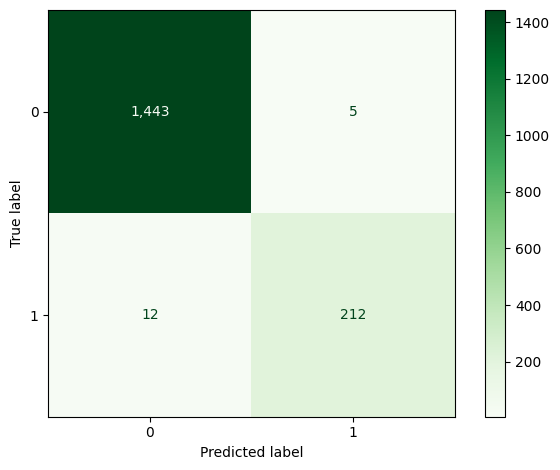

In [19]:
# Creating the Confusion Matrix for CNN
matrix_cnn = confusion_matrix(y_true = y_test, y_pred = y_predict_test_cnn)
ConfusionMatrixDisplay(confusion_matrix = matrix_cnn).plot(cmap = "Greens", values_format = ",.0f")

# Displaying the matrix
plt.tight_layout()
plt.show()

Finally, we determine the ROC AUC score and plot the ROC curve for 1D Convolutional Neural Network.

53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
The ROC-AUC score for 1D CNN is: 99.441%


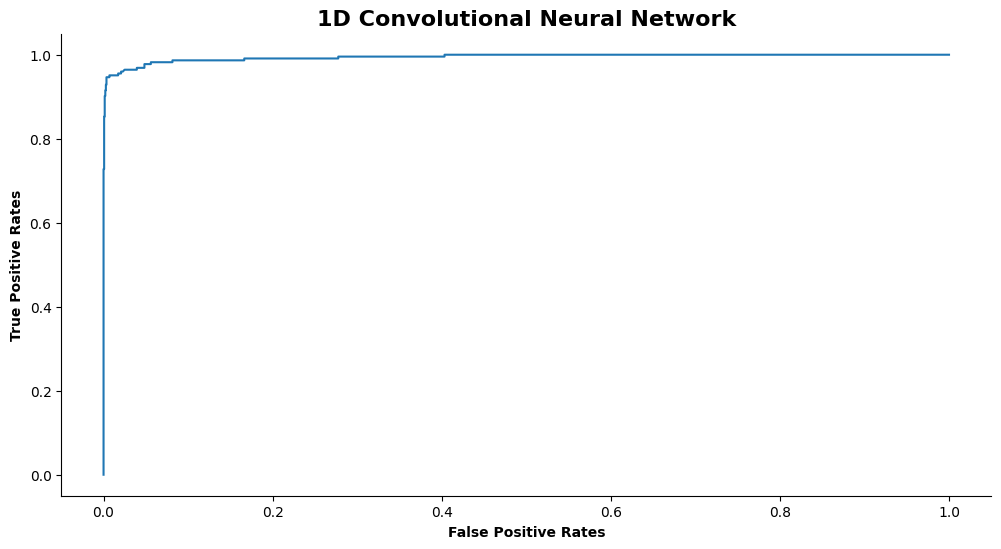

In [20]:
# CNN probabilities
y_prob_cnn = cnn.predict(X_test_cnn).ravel()
fpr_cnn, tpr_cnn, thresholds_cnn = roc_curve(y_true = y_test, y_score = y_prob_cnn)

# Calculating the ROC-AUC for the model
roc_score_cnn = roc_auc_score(y_true = y_test, y_score = y_prob_cnn)
print(f"The ROC-AUC score for 1D CNN is: {roc_score_cnn:.3%}")

# Plotting & customizing the ROC curve
plt.figure(figsize = (12, 6))
plt.plot(fpr_cnn, tpr_cnn)
plt.title(label = "1D Convolutional Neural Network", fontsize = 16, fontweight = "bold")
plt.xlabel(xlabel = "False Positive Rates", fontweight = "bold")
plt.ylabel(ylabel = "True Positive Rates", fontweight = "bold")
sns.despine()
plt.show()

### **4. Gated Recurrent Unit (GRU)**

<div style = "text-align: justify;">

A Gated Recurrent Unit (GRU) is a type of recurrent neural network designed to handle sequential data while reducing the complexity of traditional LSTMs. It uses gating mechanisms to decide which information from previous words should be kept or forgotten, allowing it to capture context without becoming too computationally heavy. GRUs are well-suited for text classification tasks where word order matters but the sequences are relatively short. A common example is spam detection, where the model learns how earlier words influence the meaning of the message. For more details, refer to [this article](https://www.geeksforgeeks.org/machine-learning/gated-recurrent-unit-networks/).

</div>

In [21]:
# Importing the library
from tensorflow.keras.layers import GRU

# Building the GRU model
gru = Sequential(
    [
        Embedding(input_dim = max_words, output_dim = 128, input_length = max_len),
    
        GRU(units = 64),
        Dropout(rate = 0.3),
    
        Dense(units = 32, activation = "relu"),
        Dropout(rate = 0.2),
    
        Dense(units = 1, activation = "sigmoid")
    ]
)

# Compiling the GRU model
gru.compile(
    optimizer = "adam",
    loss = "binary_crossentropy",
    metrics = ["accuracy"]
)

# Model summary
gru.summary()

# Fitting the GRU model
history_gru = gru.fit(
    x = X_train_cnn,
    y = y_train,
    validation_split = 0.2,
    epochs = 50,
    batch_size = 32,
    callbacks = [EarlyStopping(monitor = "val_loss", patience = 10, restore_best_weights = True)],
    verbose = 0
)

# Predicting the test set results
y_predict_test_gru = (gru.predict(X_test_cnn) >= 0.5).astype(int)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru (GRU)                       │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step


In [22]:
# Calculating the accuracy scores for test dataset
accuracy_test_gru = accuracy_score(y_true = y_test, y_pred = y_predict_test_gru)

# Generating the Classification reports for test dataset
report_gru = classification_report(y_true = y_test, y_pred = y_predict_test_gru)

# Printing a comprehensive summary Report of the three models
print(
f"""Model Performance Report for Gated Recurrent Unit (GRU)
Accuracy Score: {accuracy_test_gru:.3%}

{report_gru}"""
)

Model Performance Report for Gated Recurrent Unit (GRU)
Accuracy Score: 98.983%

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1448
           1       0.99      0.93      0.96       224

    accuracy                           0.99      1672
   macro avg       0.99      0.97      0.98      1672
weighted avg       0.99      0.99      0.99      1672



Then, we create the confusion matrix for GRU.

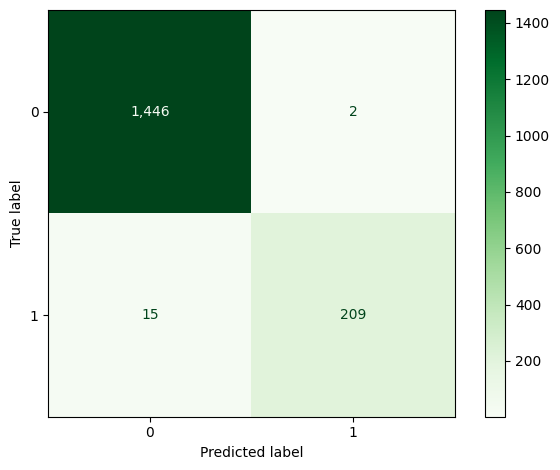

In [23]:
# Creating the Confusion Matrix for GRU
matrix_gru = confusion_matrix(y_true = y_test, y_pred = y_predict_test_gru)
ConfusionMatrixDisplay(confusion_matrix = matrix_gru).plot(cmap = "Greens", values_format = ",.0f")

# Displaying the matrix
plt.tight_layout()
plt.show()

Finally, we determine the ROC AUC score and plot the ROC curve for GRU.

53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step
The ROC-AUC score for GRU is: 98.603%


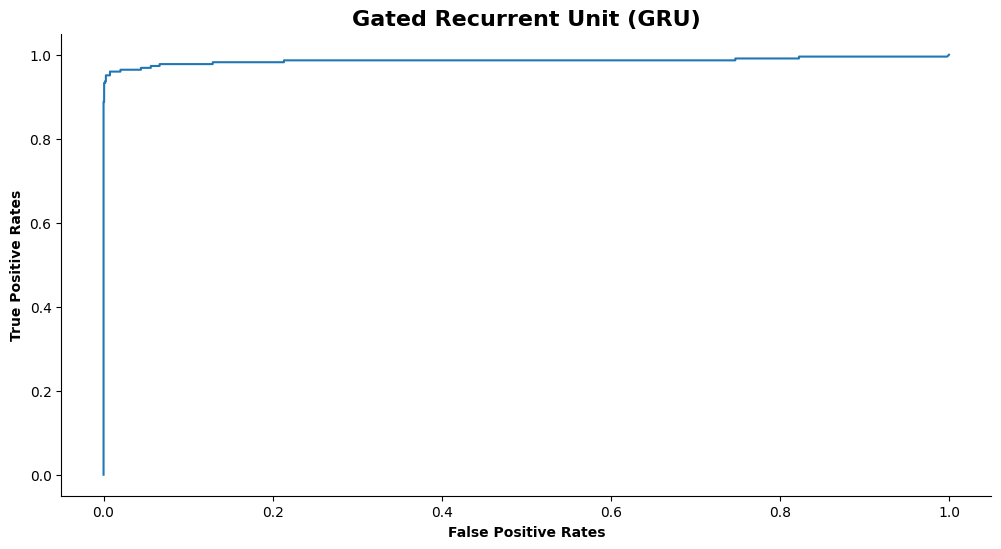

In [24]:
# GRU probabilities
y_prob_gru = gru.predict(X_test_cnn).ravel()
fpr_gru, tpr_gru, thresholds_gru = roc_curve(y_true = y_test, y_score = y_prob_gru)

# Calculating the ROC-AUC for the model
roc_score_gru = roc_auc_score(y_true = y_test, y_score = y_prob_gru)
print(f"The ROC-AUC score for GRU is: {roc_score_gru:.3%}")

# Plotting & customizing the ROC curve
plt.figure(figsize = (12, 6))
plt.plot(fpr_gru, tpr_gru)
plt.title(label = "Gated Recurrent Unit (GRU)", fontsize = 16, fontweight = "bold")
plt.xlabel(xlabel = "False Positive Rates", fontweight = "bold")
plt.ylabel(ylabel = "True Positive Rates", fontweight = "bold")
sns.despine()
plt.show()

### **5. Long Short-Term Memory (LSTM)**

<div style = "text-align: justify;">

Long Short-Term Memory (LSTM) is a type of recurrent neural network specifically designed to learn long-term dependencies in sequential data. It uses memory cells and gating mechanisms to control what information is stored, updated, or forgotten over time, which helps it overcome the vanishing gradient problem found in simple RNNs. LSTMs are commonly used in text classification tasks where context and word order matter. A typical example is spam detection, where understanding how words earlier in a message influence later ones can improve classification accuracy. For more details, refer to [this article](https://www.geeksforgeeks.org/deep-learning/deep-learning-introduction-to-long-short-term-memory/).

</div>

In [25]:
# Importing the library
from tensorflow.keras.layers import LSTM

# Building the LSTM model
lstm = Sequential(
    [
        Embedding(input_dim = max_words, output_dim = 128, input_length = max_len),
    
        LSTM(units = 64, return_sequences = False),
        Dropout(rate = 0.3),
    
        Dense(32, activation = "relu"),
        Dropout(rate = 0.2),
    
        Dense(1, activation = "sigmoid")
    ]
)

# Compiling the model
lstm.compile(
    optimizer = "adam",
    loss = "binary_crossentropy",
    metrics = ["accuracy"]
)

# Model summary
lstm.summary()

# Training with early stopping
early_stopping_lstm = EarlyStopping(
    monitor = "val_loss",
    patience = 10,
    restore_best_weights = True
)

# Fitting the LSTM model
history_lstm = lstm.fit(
    x = X_train_cnn,
    y = y_train,
    validation_split = 0.2,
    epochs = 50,
    batch_size = 32,
    callbacks = [early_stopping_lstm],
    verbose = 0
)

# Predictions
y_predict_test_lstm = (lstm.predict(X_test_cnn) >= 0.5).astype(int)

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step


Now, we calculate the accuracy score, confusion matrix, and classification report to evaluate the model's performance.

In [26]:
# Calculating the accuracy scores for test dataset
accuracy_test_lstm = accuracy_score(y_true = y_test, y_pred = y_predict_test_lstm)

# Generating the Classification reports for test dataset
report_lstm = classification_report(y_true = y_test, y_pred = y_predict_test_lstm)

# Printing a comprehensive summary Report of the three models
print(
f"""Model Performance Report for Long Short-Term Memory (LSTM)
Accuracy Score: {accuracy_test_lstm:.3%}

{report_lstm}"""
)

Model Performance Report for Long Short-Term Memory (LSTM)
Accuracy Score: 98.864%

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1448
           1       0.97      0.95      0.96       224

    accuracy                           0.99      1672
   macro avg       0.98      0.97      0.98      1672
weighted avg       0.99      0.99      0.99      1672



Then, we create the confusion matrix for LSTM.

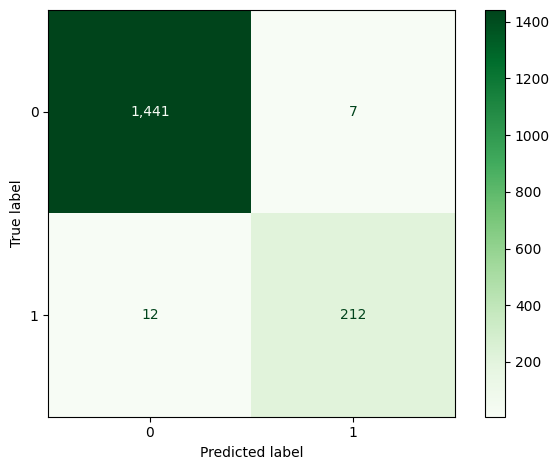

In [27]:
# Creating the Confusion Matrix for LSTM
matrix_lstm = confusion_matrix(y_true = y_test, y_pred = y_predict_test_lstm)
ConfusionMatrixDisplay(confusion_matrix = matrix_lstm).plot(cmap = "Greens", values_format = ",.0f")

# Displaying the matrix
plt.tight_layout()
plt.show()

Finally, we determine the ROC AUC score and plot the ROC curve for LSTM.

53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
The ROC-AUC score for LSTM is: 98.914%


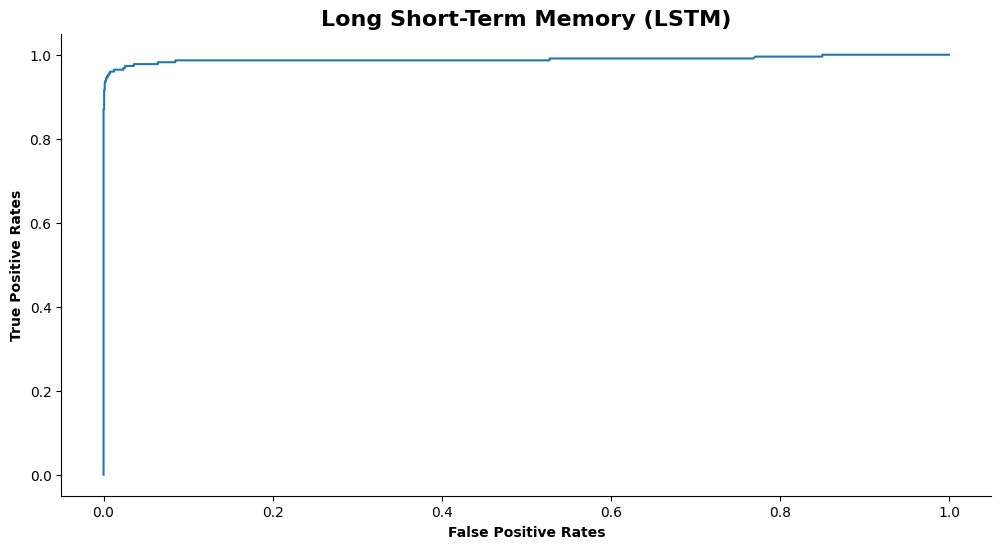

In [28]:
# LSTM probabilities
y_prob_lstm = lstm.predict(X_test_cnn).ravel()
fpr_lstm, tpr_lstm, thresholds_lstm = roc_curve(y_true = y_test, y_score = y_prob_lstm)

# Calculating the ROC-AUC for the model
roc_score_lstm = roc_auc_score(y_true = y_test, y_score = y_prob_lstm)
print(f"The ROC-AUC score for LSTM is: {roc_score_lstm:.3%}")

# Plotting & customizing the ROC curve
plt.figure(figsize=(12, 6))
plt.plot(fpr_lstm, tpr_lstm)
plt.title(label = "Long Short-Term Memory (LSTM)", fontsize = 16, fontweight = "bold")
plt.xlabel(xlabel = "False Positive Rates", fontweight = "bold")
plt.ylabel(ylabel = "True Positive Rates", fontweight = "bold")
sns.despine()
plt.show()

### **6. Bidirectional LSTM**

<div style = "text-align: justify;">

A Bidirectional Long Short-Term Memory (BiLSTM) network is an extension of the standard LSTM that processes a sequence in both forward and backward directions. This allows the model to capture context from both past and future words, which can be useful when the meaning of a word depends on surrounding terms. BiLSTMs are often applied in text classification tasks to better understand sentence-level context. An example use case is spam detection, where the importance of a word can depend on what comes before and after it in the message. For more details, refer to [this article](https://www.geeksforgeeks.org/nlp/bidirectional-lstm-in-nlp/).

</div>

In [29]:
# Importing the library
from tensorflow.keras.layers import Bidirectional

# Building the BiLSTM model
bilstm = Sequential(
    [
        Embedding(input_dim = max_words, output_dim = 128, input_length = max_len),
    
        Bidirectional(LSTM(units = 64)),  # Processes sequence in both directions
        Dropout(rate = 0.3),
    
        Dense(units = 32, activation = "relu"),
        Dropout(rate = 0.2),
    
        Dense(units = 1, activation = "sigmoid")
    ]
)

# Compiling the BiLSTM model
bilstm.compile(
    optimizer = "adam",
    loss = "binary_crossentropy",
    metrics = ["accuracy"]
)

# Model summary
bilstm.summary()

# Fitting the BiLSTM model
history_bilstm = bilstm.fit(
    x = X_train_cnn,
    y = y_train,
    validation_split = 0.2,
    epochs = 50,
    batch_size = 32,
    callbacks = [EarlyStopping(monitor = "val_loss", patience = 10, restore_best_weights = True)],
    verbose = 0
)

# Predicting the test set results
y_predict_test_bilstm = (bilstm.predict(X_test_cnn) >= 0.5).astype(int)

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step


Now, we calculate the accuracy score, confusion matrix, and classification report to evaluate the model's performance.

In [30]:
# Calculating the accuracy scores for BiLSTM
accuracy_test_bilstm = accuracy_score(y_true = y_test, y_pred = y_predict_test_bilstm)

# Generating the Classification reports for test dataset
report_bilstm = classification_report(y_true = y_test, y_pred = y_predict_test_bilstm)

# Printing a comprehensive summary Report of the three models
print(
f"""Model Performance Report for BiLSTM
Accuracy Score: {accuracy_test_bilstm:.3%}

{report_bilstm}"""
)

Model Performance Report for BiLSTM
Accuracy Score: 98.864%

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1448
           1       0.97      0.95      0.96       224

    accuracy                           0.99      1672
   macro avg       0.98      0.97      0.98      1672
weighted avg       0.99      0.99      0.99      1672



Then, we create the confusion matrix for BiLSTM.

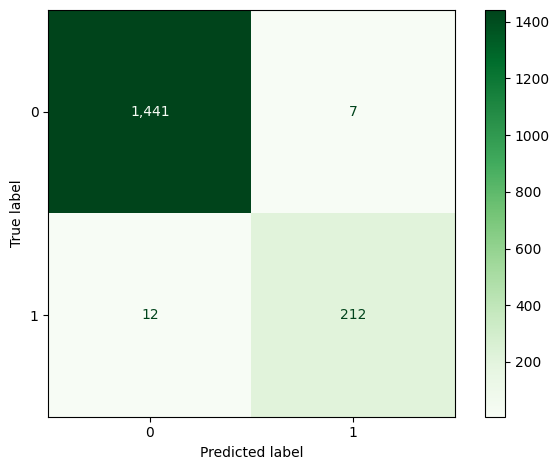

In [31]:
# Creating the Confusion Matrix for BiLSTM
matrix_bilstm = confusion_matrix(y_true = y_test, y_pred = y_predict_test_bilstm)
ConfusionMatrixDisplay(confusion_matrix = matrix_bilstm).plot(cmap = "Greens", values_format = ",.0f")

# Displaying the matrix
plt.tight_layout()
plt.show()

Finally, we determine the ROC AUC score and plot the ROC curve for BiLSTM.

53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step
The ROC-AUC score for Bidirectional LSTM is: 99.364%


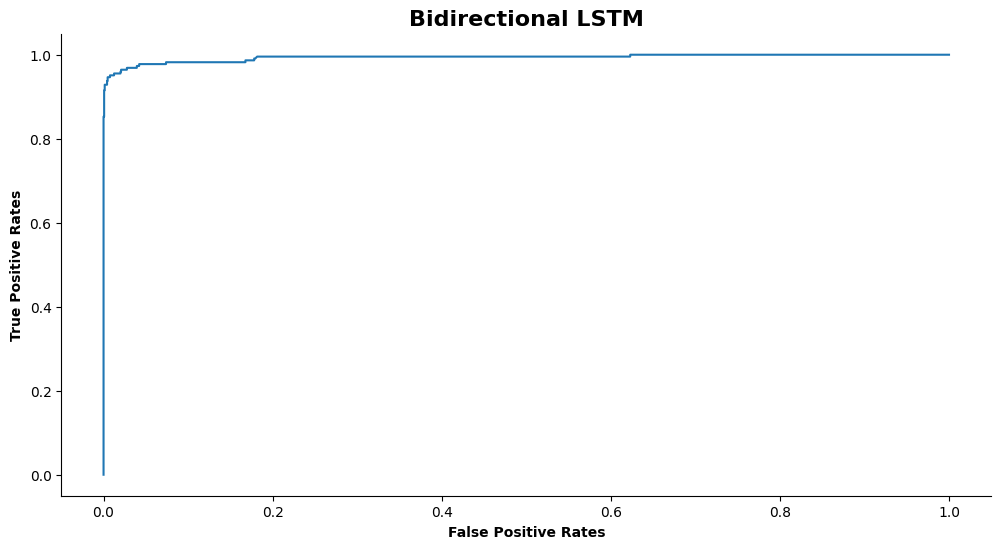

In [32]:
# BiLSTM probabilities
y_prob_bilstm = bilstm.predict(X_test_cnn).ravel()
fpr_bilstm, tpr_bilstm, thresholds_bilstm = roc_curve(y_true = y_test, y_score = y_prob_bilstm)

# Calculating the ROC-AUC for the model
roc_score_bilstm = roc_auc_score(y_true=y_test, y_score = y_prob_bilstm)
print(f"The ROC-AUC score for Bidirectional LSTM is: {roc_score_bilstm:.3%}")

# Plotting & customizing the ROC curve
plt.figure(figsize = (12, 6))
plt.plot(fpr_bilstm, tpr_bilstm)
plt.title(label = "Bidirectional LSTM", fontsize = 16, fontweight = "bold")
plt.xlabel(xlabel = "False Positive Rates", fontweight = "bold")
plt.ylabel(ylabel = "True Positive Rates", fontweight = "bold")
sns.despine()
plt.show()

### **7. CNN + LSTM Hybrid**

<div style = "text-align: justify;">

A CNN + LSTM hybrid model combines the strengths of convolutional and recurrent neural networks by using a CNN to extract local features (such as important keywords or short phrases) and an LSTM to model the sequential relationships between those features. This approach allows the model to capture both local patterns and broader context within text data. It is commonly used in text classification tasks where both phrase-level cues and word order matter. A typical example is spam detection, where the CNN identifies spam-related phrases and the LSTM analyzes how they appear across the message.

</div>

In [33]:
# Importing the library
from tensorflow.keras.layers import MaxPooling1D

# Building the hybrid model
cnn_lstm = Sequential(
    [
        Embedding(input_dim = max_words, output_dim = 128, input_length = max_len),
    
        Conv1D(filters = 64, kernel_size = 5, activation = "relu"),
        MaxPooling1D(pool_size = 2),
        
        LSTM(units = 64),
        Dropout(rate = 0.3),
        
        Dense(units = 32, activation = "relu"),
        Dense(units = 1, activation = "sigmoid")
    ]
)

# Compiling the hybrid model
cnn_lstm.compile(
    optimizer = "adam",
    loss = "binary_crossentropy",
    metrics = ["accuracy"]
)

# Model summary
cnn_lstm.summary()

# Fitting the hybrid model
history_cnn_lstm = cnn_lstm.fit(
    x = X_train_cnn,
    y = y_train,
    validation_split = 0.2,
    epochs = 50,
    batch_size = 32,
    callbacks = [EarlyStopping(monitor = "val_loss", patience = 10, restore_best_weights = True)],
    verbose = 0
)

# Predicting the test set results
y_predict_test_cnn_lstm = (cnn_lstm.predict(X_test_cnn) >= 0.5).astype(int)

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


Now, we calculate the accuracy score, confusion matrix, and classification report to evaluate the model's performance.

In [34]:
# Calculating the accuracy scores for test dataset
accuracy_test_cnn_lstm = accuracy_score(y_true = y_test, y_pred = y_predict_test_cnn_lstm)

# Generating the Classification reports for test dataset
report_cnn_lstm = classification_report(y_true = y_test, y_pred = y_predict_test_cnn_lstm)

# Printing a comprehensive summary Report of the three models
print(
f"""Model Performance Report for CNN + LSTM Hybrid
Accuracy Score: {accuracy_test_cnn_lstm:.3%}

{report_cnn_lstm}"""
)

Model Performance Report for CNN + LSTM Hybrid
Accuracy Score: 98.923%

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1448
           1       0.99      0.93      0.96       224

    accuracy                           0.99      1672
   macro avg       0.99      0.97      0.98      1672
weighted avg       0.99      0.99      0.99      1672



Then, we create the confusion matrix for the hybrid model.

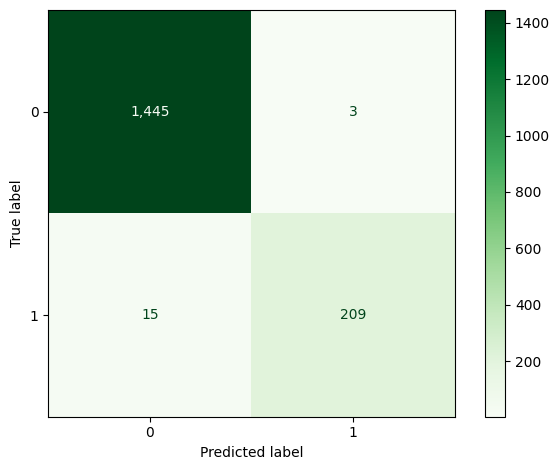

In [35]:
# Creating the Confusion Matrix for the hybrid model
matrix_cnn_lstm = confusion_matrix(y_true = y_test, y_pred = y_predict_test_cnn_lstm)
ConfusionMatrixDisplay(confusion_matrix = matrix_cnn_lstm).plot(cmap = "Greens", values_format = ",.0f")

# Displaying the matrix
plt.tight_layout()
plt.show()

Finally, we determine the ROC AUC score and plot the ROC curve for the hybrid CNN-LSTM model.

53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
The ROC-AUC score for CNN + LSTM Hybrid is: 0.993


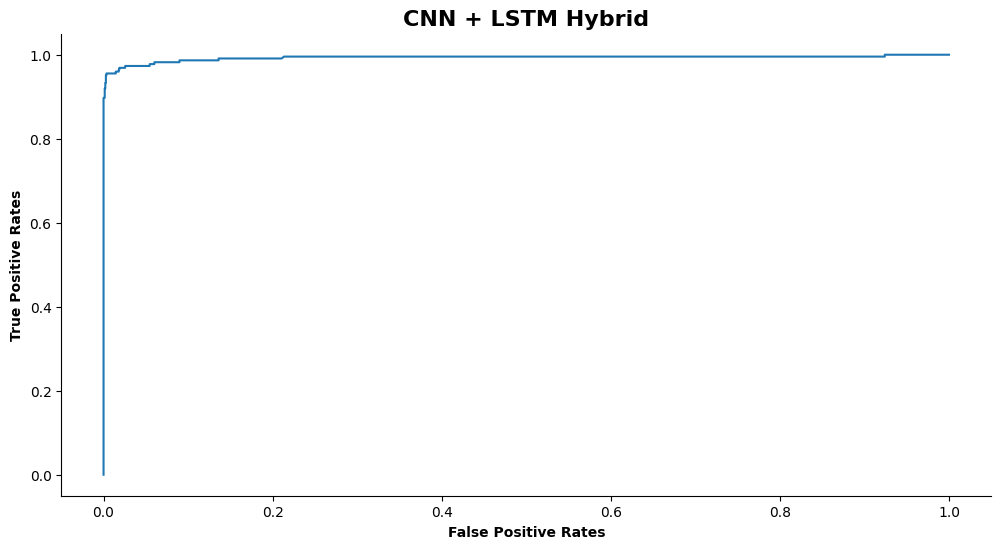

In [36]:
# CNN + LSTM probabilities
y_prob_cnn_lstm = cnn_lstm.predict(X_test_cnn).ravel()
fpr_cnn_lstm, tpr_cnn_lstm, thresholds_cnn_lstm = roc_curve(y_true = y_test, y_score = y_prob_cnn_lstm)

# Calculating the ROC-AUC for the model
roc_score_cnn_lstm = roc_auc_score(y_true = y_test, y_score = y_prob_cnn_lstm)
print(f"The ROC-AUC score for CNN + LSTM Hybrid is: {roc_score_cnn_lstm:.3f}")

# Plotting & customizing the ROC curve
plt.figure(figsize = (12, 6))
plt.plot(fpr_cnn_lstm, tpr_cnn_lstm)
plt.title(label = "CNN + LSTM Hybrid", fontsize = 16, fontweight = "bold")
plt.xlabel(xlabel = "False Positive Rates", fontweight = "bold")
plt.ylabel(ylabel = "True Positive Rates", fontweight = "bold")
sns.despine()
plt.show()

## Performance & Evaluation

### **Overfitting Check**

<div style = "text-align: justify;">

Before finally selecting on a model, we want to check whether any of the models have any overfitting issues. ***Overfitting** is a common problem in machine learning where a model learns the training data too well, including its noise and specific patterns, making it perform poorly on new, unseen data*. 

Usually one of the telltale signs of overfitting is a large difference between the training and testing accuracies of a model. If a model has a very high training accuracy but a significantly lower testing accuracy, it may be overfitting the training data. We have already determined the accuracy scores of the test data of the models, now we start by calculating the training accuracies of all three models.

</div>

In [37]:
# First, we determine the y_predict values of the train datasets for the models
y_predict_train_mnb = mnb.predict(X = X_train_mnb)
y_predict_train_mlp = (mlp.predict(X_train_mlp) >= 0.5).astype(int)
y_predict_train_cnn = (cnn.predict(X_train_cnn) >= 0.5).astype(int)
y_predict_train_gru = (gru.predict(X_train_cnn) >= 0.5).astype(int)
y_predict_train_lstm = (lstm.predict(X_train_cnn) >= 0.5).astype(int)
y_predict_train_bilstm = (bilstm.predict(X_train_cnn) >= 0.5).astype(int)
y_predict_train_cnn_lstm = (cnn_lstm.predict(X_train_cnn) >= 0.5).astype(int)

# Calculating the accuracy scores of the train dataset for all models
accuracy_train_mnb = accuracy_score(y_true = y_train, y_pred = y_predict_train_mnb)
accuracy_train_mlp = accuracy_score(y_true = y_train, y_pred = y_predict_train_mlp)
accuracy_train_cnn = accuracy_score(y_true = y_train, y_pred = y_predict_train_cnn)
accuracy_train_gru = accuracy_score(y_true = y_train, y_pred = y_predict_train_gru)
accuracy_train_lstm = accuracy_score(y_true = y_train, y_pred = y_predict_train_lstm)
accuracy_train_bilstm = accuracy_score(y_true = y_train, y_pred = y_predict_train_bilstm)
accuracy_train_cnn_lstm = accuracy_score(y_true = y_train, y_pred = y_predict_train_cnn_lstm)

# Printing the accuracy scores of both the train and test datasets and checking the difference
print(
f"""
Train-Test Accuracy Differences:

Multinomial Naive Bayes: {abs(accuracy_train_mnb - accuracy_test_mnb):.2%}
Multi-layer Perceptron: {abs(accuracy_train_mlp - accuracy_test_mlp):.2%}
1D CNN: {abs(accuracy_train_cnn - accuracy_test_cnn):.2%}
GRU: {abs(accuracy_train_gru - accuracy_test_gru):.2%}
LSTM: {abs(accuracy_train_lstm - accuracy_test_lstm):.2%}
BiLSTM: {abs(accuracy_train_bilstm - accuracy_test_bilstm):.2%}
CNN + LSTM Hybrid: {abs(accuracy_train_cnn_lstm - accuracy_test_cnn_lstm):.2%}"""
)

122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step

Train-Test Accuracy Differences:

Multinomial Naive Bayes: 0.67%
Multi-layer Perceptron: 1.22%
1D CNN: 0.81%
GRU: 0.63%
LSTM: 0.88%
BiLSTM: 0.88%
CNN + LSTM Hybrid: 0.79%


<div style = "text-align: justify;">

**Key Insights**
* The smallest train–test accuracy gap (**0.632%**) is observed for the **GRU**, indicating the strongest generalization and minimal overfitting among all models.  
* **Multinomial Naive Bayes (0.675%)** closely follows, demonstrating that even simple probabilistic models can generalize exceptionally well on this dataset.  
* The **Multi-layer Perceptron (1.222%)** shows the largest gap, suggesting it is the most prone to overfitting among the evaluated models.  
* The **1D CNN (0.812%)**, **CNN + LSTM Hybrid (0.795%)**, **LSTM (0.880%)**, and **BiLSTM (0.880%)** all maintain relatively low gaps below 1%, demonstrating stable learning despite higher model complexity.  
* **Overall**, most models generalize well, with performance differences driven more by architectural strengths than by overfitting behavior. The 1D CNN's overfitting of **0.812%** remains acceptably low, supporting its selection as the best model.

</div>

### **Model Performance Comparison**

We create a summary table compiling the accuracy scores, precision, recall, F1-scores, ROC-AUC score, and overfitting measure for all models to facilitate comparison.

In [38]:
## The table was prepared and formatted with the help of AI

# Importing the necessary libraries
from sklearn.metrics import precision_score, recall_score, f1_score

# Creating the DataFrame
model_comparison = pd.DataFrame(
    {
        "Model": ["MNB", "MLP", "1D CNN", "GRU", "LSTM", "BiLSTM", "CNN + LSTM"],
        "Accuracy": [accuracy_test_mnb, accuracy_test_mlp, accuracy_test_cnn, accuracy_test_gru, accuracy_test_lstm, accuracy_test_bilstm, accuracy_test_cnn_lstm],
        "Precision": [
            precision_score(y_true = y_test, y_pred = y_predict_test_mnb),
            precision_score(y_true = y_test, y_pred = y_predict_test_mlp),
            precision_score(y_true = y_test, y_pred = y_predict_test_cnn),
            precision_score(y_true = y_test, y_pred = y_predict_test_gru),
            precision_score(y_true = y_test, y_pred = y_predict_test_lstm),
            precision_score(y_true = y_test, y_pred = y_predict_test_bilstm),
            precision_score(y_true = y_test, y_pred = y_predict_test_cnn_lstm)
        ],
        "Recall": [
            recall_score(y_true = y_test, y_pred = y_predict_test_mnb),
            recall_score(y_true = y_test, y_pred = y_predict_test_mlp),
            recall_score(y_true = y_test, y_pred = y_predict_test_cnn),
            recall_score(y_true = y_test, y_pred = y_predict_test_gru),
            recall_score(y_true = y_test, y_pred = y_predict_test_lstm),
            recall_score(y_true = y_test, y_pred = y_predict_test_bilstm),
            recall_score(y_true = y_test, y_pred = y_predict_test_cnn_lstm)
        ],
        "F1-Score": [
            f1_score(y_true = y_test, y_pred = y_predict_test_mnb),
            f1_score(y_true = y_test, y_pred = y_predict_test_mlp),
            f1_score(y_true = y_test, y_pred = y_predict_test_cnn),
            f1_score(y_true = y_test, y_pred = y_predict_test_gru),
            f1_score(y_true = y_test, y_pred = y_predict_test_lstm),
            f1_score(y_true = y_test, y_pred = y_predict_test_bilstm),
            f1_score(y_true = y_test, y_pred = y_predict_test_cnn_lstm)
        ],
        "ROC-AUC": [roc_score_mnb, roc_score_mlp, roc_score_cnn, roc_score_gru, roc_score_lstm, roc_score_bilstm, roc_score_cnn_lstm],
        "Overfitting": [
            accuracy_train_mnb - accuracy_test_mnb,
            accuracy_train_mlp - accuracy_test_mlp,
            accuracy_train_cnn - accuracy_test_cnn,
            accuracy_train_gru - accuracy_test_gru,
            accuracy_train_lstm - accuracy_test_lstm,
            accuracy_train_bilstm - accuracy_test_bilstm,
            accuracy_train_cnn_lstm - accuracy_test_cnn_lstm,
        ]
    }
)

# Sorting and ranking by Accuracy
model_comparison = model_comparison.sort_values(by = "Accuracy", ascending = False).reset_index(drop = True)
model_comparison.insert(0, "Rank", range(1, len(model_comparison) + 1))

# Function to highlight MNB row
def highlight_mnb(row):
    if row["Model"] == "MNB":
        return ["font-weight: bold; background-color: #E8F4FD"] * len(row)
    return [""] * len(row)

# Applying styling
styled_table = model_comparison.style.format(
    {
        "Accuracy": "{:.2%}",
        "Precision": "{:.2%}",
        "Recall": "{:.2%}",
        "F1-Score": "{:.2%}",
        "ROC-AUC": "{:.2%}",
        "Overfitting": "{:.2%}"
    }
)\
    .apply(highlight_mnb, axis = 1)\
    .background_gradient(subset = ["Accuracy"], cmap = "RdYlGn", vmin = 0.90, vmax = 1.0)\
    .background_gradient(subset = ["Precision"], cmap = "RdYlGn", vmin = 0.90, vmax = 1.0)\
    .background_gradient(subset = ["Recall"], cmap = "RdYlGn", vmin = 0.85, vmax = 1.0)\
    .background_gradient(subset = ["F1-Score"], cmap = "RdYlGn", vmin = 0.90, vmax = 1.0)\
    .background_gradient(subset = ["ROC-AUC"], cmap = "RdYlGn", vmin = 0.90, vmax = 1.0)\
    .background_gradient(subset = ["Overfitting"], cmap = "RdYlGn_r", vmin = 0.0, vmax = 0.05)\
    .set_properties(**{
        "text-align": "center",
        "font-size": "11pt",
        "padding": "10px"
    })\
    .set_table_styles([
        {"selector": "", "props": [
            ("border-collapse", "collapse"),
            ("width", "100%")
        ]},
        {"selector": "th", "props": [
            ("background-color", "#2C3E50"),
            ("color", "white"),
            ("font-weight", "bold"),
            ("text-align", "center"),
            ("font-size", "14pt"),
            ("padding", "14px")
        ]},
        {"selector": "td", "props": [
            ("border", "1px solid #ddd"),
            ("padding", "10px")
        ]},
        {"selector": "caption", "props": [
            ("caption-side", "top"),
            ("font-size", "18pt"),
            ("font-weight", "bold"),
            ("text-align", "center"),
            ("padding", "10px")
        ]}
    ])\
    .set_caption("Model Performance Comparison — Sorted by Accuracy")

# Displaying the table
display(styled_table)

,Rank,Model,Accuracy,Precision,Recall,F1-Score,ROC-AUC,Overfitting
0,1,1D CNN,98.98%,97.70%,94.64%,96.15%,99.44%,0.81%
1,2,GRU,98.98%,99.05%,93.30%,96.09%,98.60%,0.63%
2,3,CNN + LSTM,98.92%,98.58%,93.30%,95.87%,99.29%,0.79%
3,4,LSTM,98.86%,96.80%,94.64%,95.71%,98.91%,0.88%
4,5,BiLSTM,98.86%,96.80%,94.64%,95.71%,99.36%,0.88%
5,6,MNB,98.68%,96.76%,93.30%,95.00%,99.07%,0.67%
6,7,MLP,98.27%,96.21%,90.62%,93.33%,98.10%,1.22%


<div style = "text-align: justify;">

**Key Insights**
* **Best accuracy:** The **1D CNN** and **GRU** achieve the highest accuracy (**98.98%**), indicating the strongest overall correctness in predictions.  
* **Best precision:** The **GRU** leads in precision (**99.05%**), making it the most reliable model when predicting spam (fewest false alarms).  
* **Best recall:** The **1D CNN**, **LSTM**, and **BiLSTM** record the highest recall (**94.64%**), meaning they catch the most spam messages among all models.  
* **Best F1-score:** The **1D CNN** attains the top F1-score (**96.15%**), reflecting the best balance between precision and recall.  
* **Best ROC-AUC:** The **1D CNN** slightly outperforms others with the highest ROC-AUC (**99.44%**), indicating excellent class separability.  
* **Lowest overfitting:** The **GRU** shows the lowest overfitting (**0.63%**), highlighting strong generalization.
* **Overall best model:** The **1D CNN** stands out as the best-performing model overall, achieving top scores in accuracy, F1-score, and ROC-AUC while maintaining low overfitting.

When we compare the neural networks against the Multinomial Naive Bayes, we can see that while **MNB** remains a strong and competitive baseline, **five** neural network models surpassed its accuracy (MNB only surpassed the **MLP**), demonstrating gains in capturing complex spam patterns beyond keyword frequency.

*It is important to acknowledge that the performance differences between models are relatively small, with accuracies ranging from **98.27%** (MLP) to **98.98%** (1D CNN/GRU)—a spread of only **0.71 percentage points**. This narrow margin suggests that for this particular dataset, all models perform comparably well, and the choice of model may depend more on factors such as computational efficiency, interpretability, and deployment constraints rather than raw performance alone.*

</div>

### **Confusion Matrices**

We compile the **seven** confusion matrices generated above into a single plot for easier comparison.

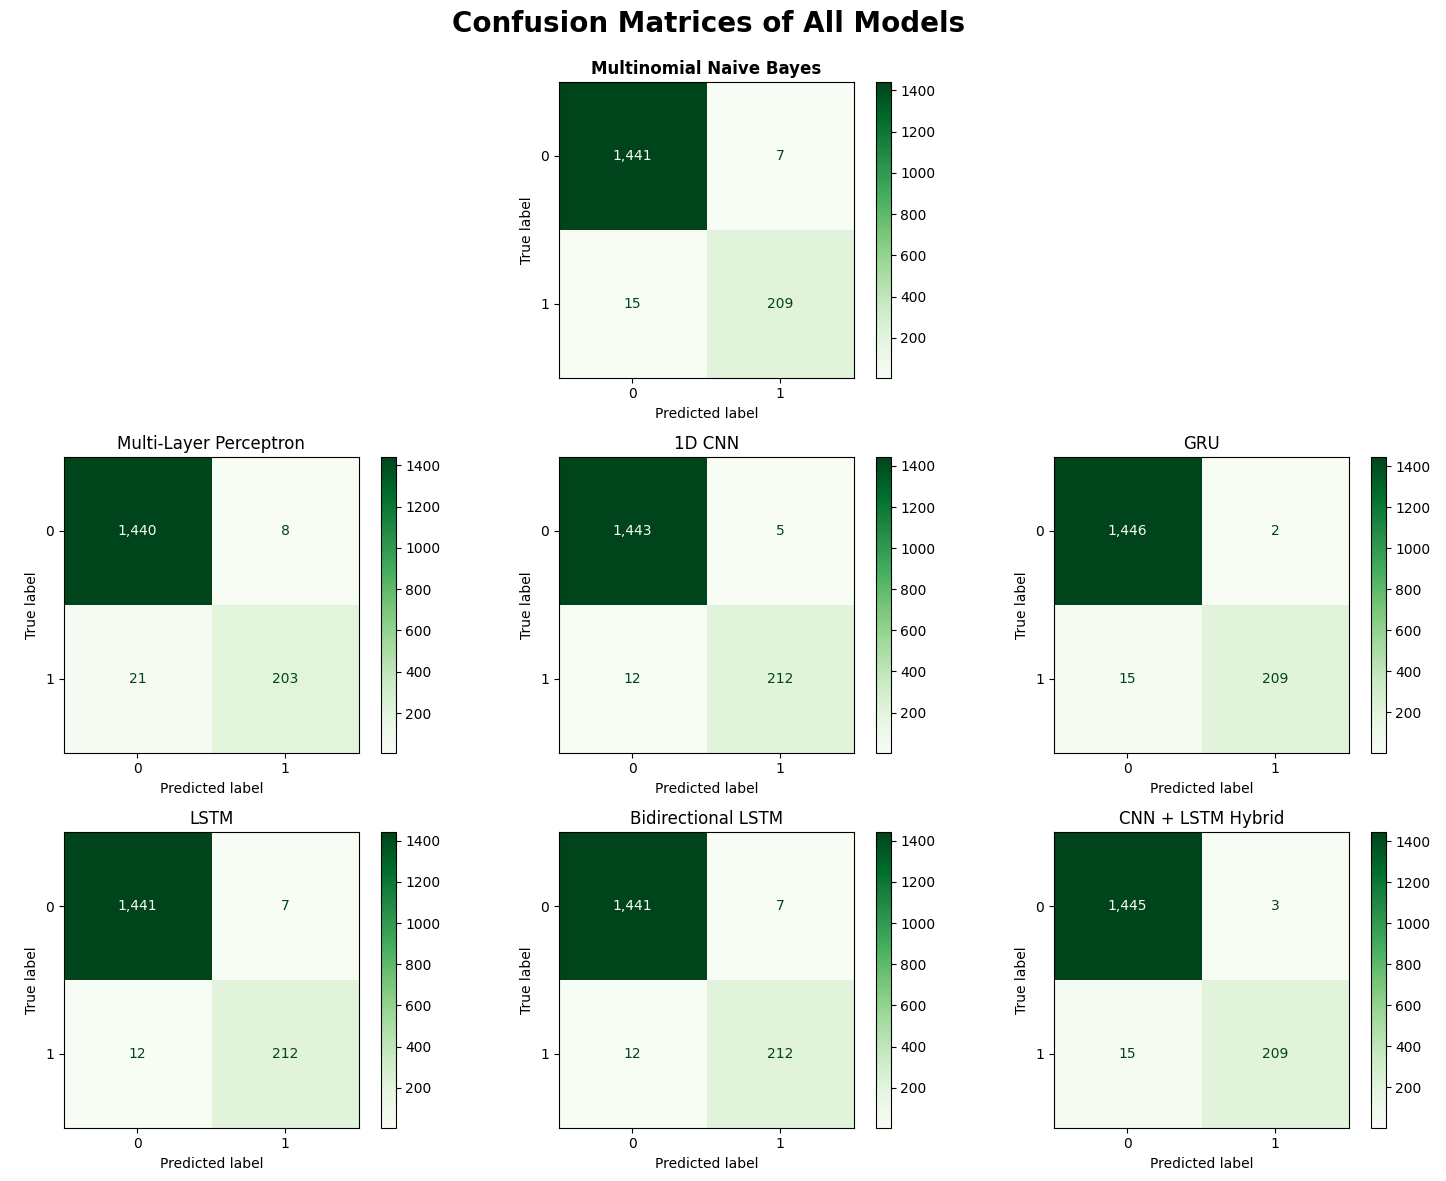

In [39]:
# Setting up the plot size for 3x3 display
fig, axes = plt.subplots(nrows = 3, ncols = 3, figsize = (15, 12))
fig.suptitle(t = "Confusion Matrices of All Models", fontsize = 20, fontweight = "bold")


# Row 1: MNB
ConfusionMatrixDisplay(confusion_matrix = matrix_mnb).plot(ax = axes[0, 1], cmap = "Greens", values_format = ",.0f")
axes[0, 1].set_title(label = "Multinomial Naive Bayes", fontsize = 12, fontweight = "bold")
axes[0, 0].axis("off")
axes[0, 2].axis("off")


# Row 2: MLP, 1D CNN, GRU
ConfusionMatrixDisplay(confusion_matrix = matrix_mlp).plot(ax = axes[1, 0], cmap = "Greens", values_format = ",.0f")
axes[1, 0].set_title(label = "Multi-Layer Perceptron", fontsize = 12)

ConfusionMatrixDisplay(confusion_matrix = matrix_cnn).plot(ax = axes[1, 1], cmap = "Greens", values_format = ",.0f")
axes[1, 1].set_title(label = "1D CNN", fontsize = 12)

ConfusionMatrixDisplay(confusion_matrix = matrix_gru).plot(ax = axes[1, 2], cmap = "Greens", values_format = ",.0f")
axes[1, 2].set_title(label = "GRU", fontsize = 12)


# Row 3: LSTM, BiLSTM, CNN+LSTM
ConfusionMatrixDisplay(confusion_matrix = matrix_lstm).plot(ax = axes[2, 0], cmap = "Greens", values_format = ",.0f")
axes[2, 0].set_title(label = "LSTM", fontsize = 12)

ConfusionMatrixDisplay(confusion_matrix = matrix_bilstm).plot(ax = axes[2, 1], cmap = "Greens", values_format = ",.0f")
axes[2, 1].set_title(label = "Bidirectional LSTM", fontsize = 12)

ConfusionMatrixDisplay(confusion_matrix = matrix_cnn_lstm).plot(ax = axes[2, 2], cmap = "Greens", values_format = ",.0f")
axes[2, 2].set_title(label = "CNN + LSTM Hybrid", fontsize = 12)


# Customizing the layout
plt.tight_layout()
plt.subplots_adjust(top = 0.92)
plt.show()

<div style = "text-align: justify;">

**Key Insights**

Now, our goals are to either have the minimum number false positive or false negative predictions. Depending on the context and what we want to achieve, we can choose to prioritize one over the other.

* **Minimize false positives** *(ham messages incorrectly predicted as spam)*: The **GRU** and **CNN + LSTM Hybrid** perform best with only **2** and **3** false positives respectively, making them ideal when avoiding unnecessary spam flagging is critical.  
* **Minimize false negatives** *(spam messages incorrectly predicted as ham)*: The **1D CNN**, **LSTM**, and **BiLSTM** lead with only **12** false negatives each, meaning they miss the fewest spam messages among all models.  
* **Overall best model:** The **CNN + LSTM Hybrid** offers strong overall performance with the second-lowest false positives (**3**) and a competitive false negative count (**15**), achieving a good balance between catching spam and avoiding false alarms.  
* **Second-best balanced model:** The **GRU** closely follows with the lowest false positives (**2**) and **15** false negatives, demonstrating excellent precision while maintaining reasonable recall.

Again when we compare the neural networks against the Multinomial Naive Bayes, we see that despite its simplicity, MNB remains highly competitive with only **7** false positives and **15** false negatives, serving as a strong baseline that rivals more complex neural models. Notably, only the **MLP** performs worse than MNB in terms of false negatives (**21**).

</div>

<div style = "text-align: justify;">

## Model Selection Decision
Based on the comprehensive evaluation of all models across multiple performance metrics, the **1D Convolutional Neural Network (1D CNN)** emerges as the optimal choice for spam detection on the SMS Spam Collection dataset. This model achieves the highest accuracy (tied with GRU), best F1-score, highest ROC-AUC, and best recall, making it the most reliable and effective option for this classification task. It also has the best balance between minimizing false positives and false negatives, which is crucial for maintaining user trust while effectively identifying spam messages.

If we put the numbers of 1D CNN and Multinomial Naive Bayes side by side, we get the following table:

| ***Metric*** | **Multinomial Naive Bayes** | **1D CNN** | **Better Model** |
|:-----------|:---------------------------:|:---------------------:|:--------------:|
| ***Accuracy*** | 98.68% | 98.98% | 1D CNN |
| ***Precision*** | 96.76% | 97.70% | 1D CNN |
| ***Recall*** | 93.30% | 94.64% | 1D CNN |
| ***F1-Score*** | 95.00% | 96.15% | 1D CNN |
| ***ROC-AUC*** | 99.07% | 99.44% | 1D CNN |
| ***False Positive Rate*** | 0.48% | 0.35% | 1D CNN |
| ***False Negative Rate*** | 6.70% | 5.36% | 1D CNN |
| ***Overfitting*** | 0.67% | 0.81% | MNB |

For a quick summary, here are the key performance metrics of the **1D CNN** model:
* **Accuracy:** 98.98%. Tied for highest among all models, indicating superior overall correctness
* **Precision:** 97.70%. Strong at minimizing false positives, crucial for user trust
* **Recall:** 94.64%. Best at capturing spam messages, with only 12 false negatives
* **F1-Score:** 96.15%. Highest among all models, reflecting the best balance between precision and recall
* **ROC-AUC:** 99.44%. Highest among all models, indicating excellent class separability
* **Overfitting Measure:** 0.81%. Low overfitting, demonstrating good generalization to unseen data

</div>

<div style = "text-align: justify;">

## Hyperparameter Tuning

We performed hyperparameter tuning on the selected 1D CNN model using both `RandomizedSearchCV` and `Optuna` to find the optimal combination of hyperparameters that yield the best performance. But both times the results were not satisfactory and the accuracy scores dropped or barely improved. As both the methods take a lot of time and computational power, the codes are removed.

</div>

<div style = "text-align: justify;">

# **Conclusion**

This project successfully compared **Multinomial Naive Bayes** against **six neural network architectures** for SMS spam detection, demonstrating that while deep learning models can outperform traditional probabilistic classifiers, the performance gains are incremental rather than dramatic on this text classification task.

The **1D Convolutional Neural Network (1D CNN)** emerged as the best-performing model, achieving **98.98% accuracy**, **97.70% precision**, **94.64% recall**, and a **96.15% F1-score**—surpassing Multinomial Naive Bayes across all metrics. The 1D CNN's ability to detect **local patterns** such as spam-indicative keywords and short phrases (n-grams) through convolution filters proved most effective for this classification task, while maintaining strong generalization with only **0.81% overfitting**.

**Final Model Ranking by Accuracy**:
1. **1D Convolutional Neural Network (98.98%)**
2. Gated Recurrent Unit (98.98%)
3. Bidirectional LSTM (98.86%)
4. Long Short-Term Memory (98.86%)
5. CNN + LSTM Hybrid (98.86%)
6. **Multinomial Naive Bayes (98.68%)**
7. Multi-Layer Perceptron (98.27%)

**Key Takeaway:** Despite Multinomial Naive Bayes ranking 6th, its **98.68% accuracy** with minimal computational overhead validates it as a highly effective baseline for spam detection. The 1D CNN's marginal **0.30 percentage point improvement** comes with additional training complexity—suggesting that for resource-constrained applications, MNB remains a practical choice, while the 1D CNN is preferred when **maximum recall** (catching the most spam with only 12 false negatives) and **best F1-score/ROC-AUC** are critical requirements.

</div>